In [3]:
""" setup """
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal
from pyhacores.under_construction.clock_recovery.gardner import GardnerTimingRecovery
from scipy.interpolate import interp1d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


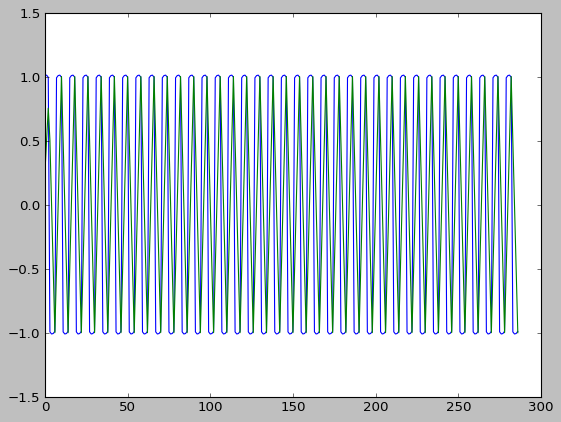

In [50]:
# input data
from pyhacores.moving_average.model import MovingAverage
from pyhacores.under_construction.fsk_demodulator.model import FSKDemodulator
from pyhacores.under_construction.fsk_modulator.model import FSKModulator
from pyhacores.under_construction.quadrature_demodulator.model import QuadratureDemodulator

symbols = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0] * 4
sps = 4
fs = 300e3
deviation = 70e3
# apply SPS
data = []
for x in symbols:
    data.extend([x] * sps)

fskmod = FSKModulator(deviation, fs)
sig = fskmod.model_main(data)

# awgn channel
sig_ch = sig + np.random.normal(scale=np.sqrt(0.001))

# quadrature demodulator
qd = QuadratureDemodulator(fs / (2 * np.pi * deviation))
demod = qd.model_main(sig_ch)

# matched filtering
mav = MovingAverage(sps)
match = mav.model_main(demod)


plt.plot(demod)
plt.plot(match)
plt.show()

#

In [25]:
def case(f_delay):
    #channel
    sig_f = fract_delay(sig, f_delay)

    recover = GardnerTimingRecovery(sps)

    ret, err, mu = recover.model_main(sig_f)
    
    plt.plot(ret, label='ret')
    plt.plot(err, label='err')
    plt.plot(mu, label='mu')
    plt.plot(sig_f[::sps], label='decimated input')
    plt.title('Fractional delay:' + str(f_delay))
    plt.grid()
    plt.legend()
    plt.show()

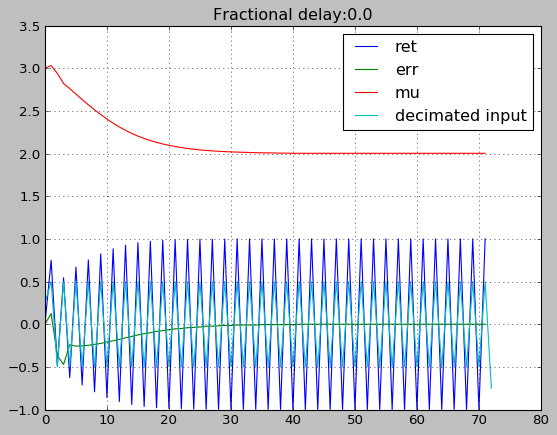

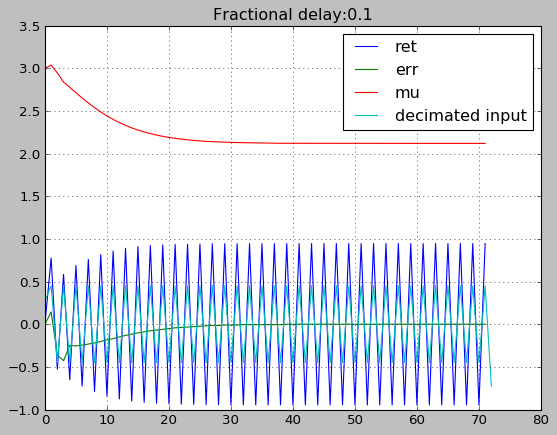

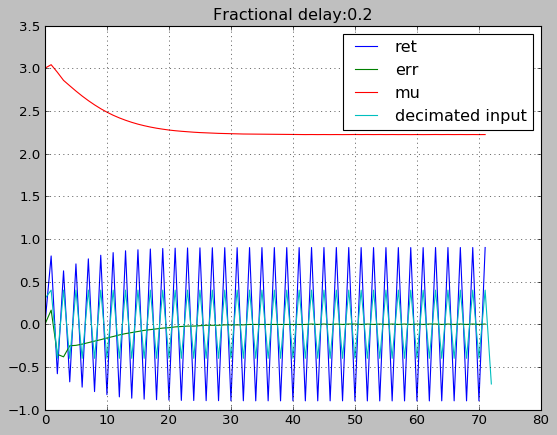

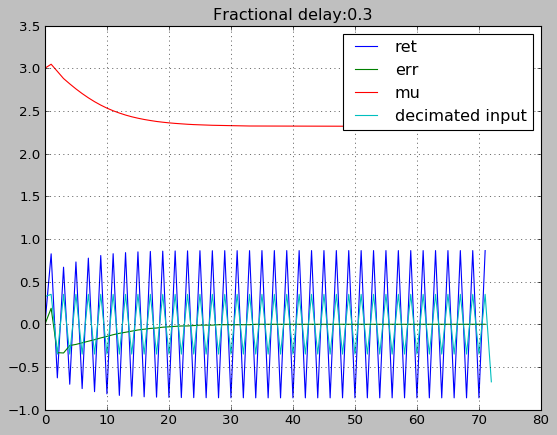

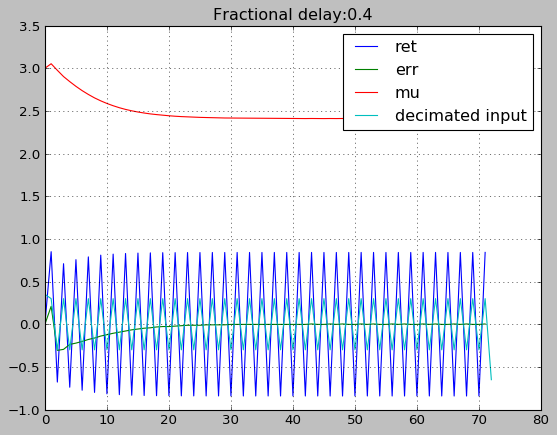

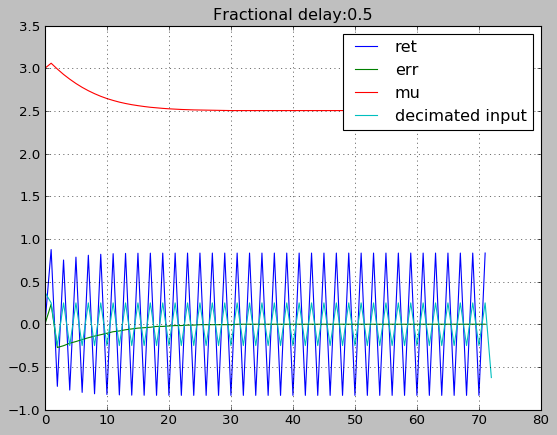

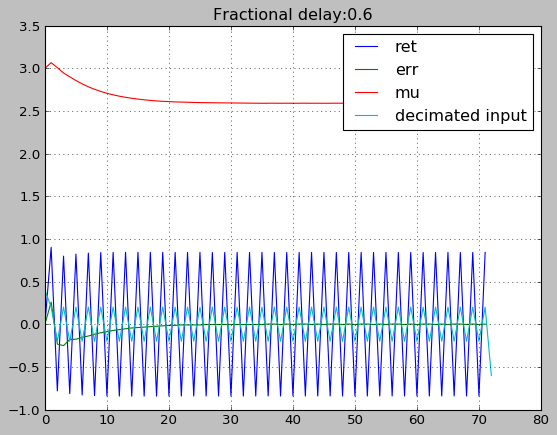

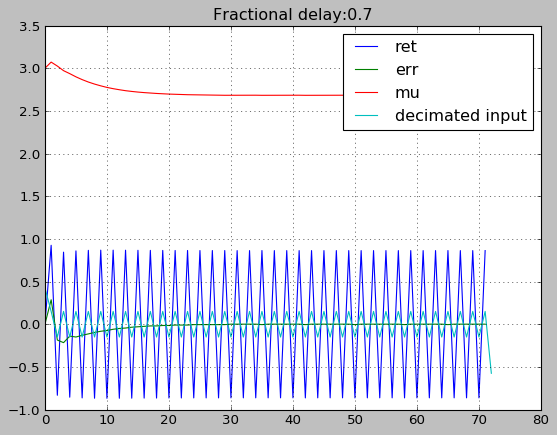

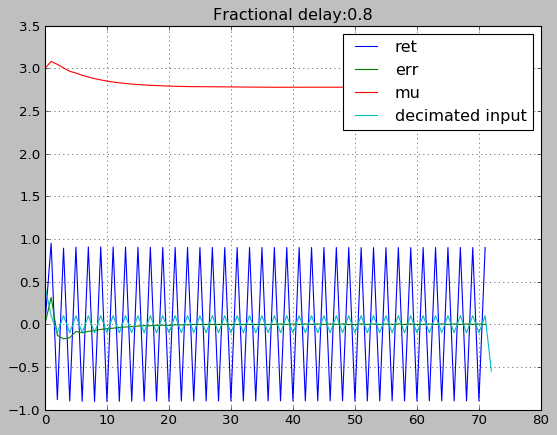

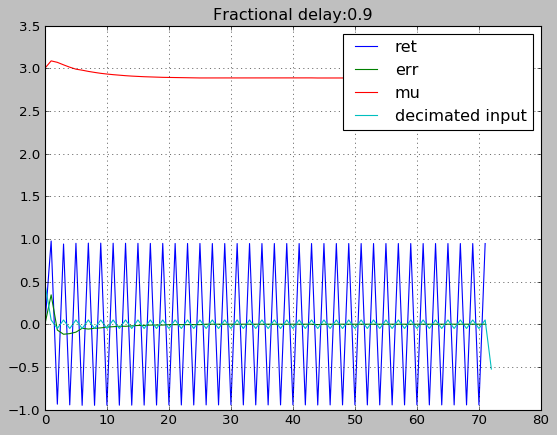

In [4]:
for x in range(10):
    case(x/10)